In [1]:
import imp
import sympy
import numpy as np
sympy.init_printing()
x = sympy.symbols('x', real=True)
u = sympy.symbols('u', cls=sympy.Function)
f = x * x + u(x) * u(x)
xi = sympy.Integer(0)
eta = sympy.Integer(0)

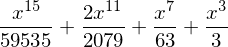

In [2]:
import picard
picard = imp.reload(picard)
picard.solve(f, xi, eta, n_iterations=3)

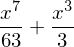

In [3]:
import taylor_series
taylor_series = imp.reload(taylor_series)
taylor_series.solve(f, xi, eta, n_iterations=7)

In [4]:
import euler
euler = imp.reload(euler)
euler.explicit_solve(lambda x, y: x * x + y * y, 0.0, 1.0, 0.0, n=5)

array([ 0.        ,  0.        ,  0.015625  ,  0.07818604,  0.2203393 ])

In [5]:
import runge_kutta
runge_kutta = imp.reload(runge_kutta)
runge_kutta.solve_4(lambda x, y: x * x + y * y, 0.0, 1.0, 0.0, n=6)

array([ 0.        ,  0.00266687,  0.02136009,  0.0724512 ,  0.17409018,
        0.35025755])

In [6]:
(x + u(x)).evalf(100, subs={x: 4, u(x): sympy.pi})

In [7]:
f = sympy.lambdify(x, (x*u(x)).subs([(u(x), sympy.pi)]), 'numpy')
a = np.arange(10)
f(a)

array([  0.        ,   3.14159265,   6.28318531,   9.42477796,
        12.56637061,  15.70796327,  18.84955592,  21.99114858,
        25.13274123,  28.27433388])